<figure>
    <center> <img src="./images/Lecture 5 Exercise.PNG"  alt='missing' width="1100"  ><center/>
<figure/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('Data Sets Lecture 5 Exercise CODEBASICS.csv')
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
dummies = pd.get_dummies(data['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [4]:
merged = pd.concat([data,dummies],axis='columns')

In [5]:
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [7]:
final = merged.drop('Car Model', axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [38]:
# creating input variables
x = final[['Mileage','Age(yrs)','Audi A5','BMW X5']]
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [39]:
# Creating Output Variable
y= final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

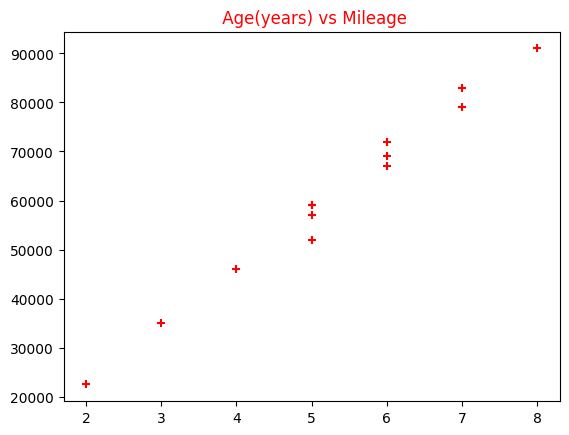

In [40]:
plt.scatter(final['Age(yrs)'],final['Mileage'],marker='+',c='r')
plt.title(" Age(years) vs Mileage",c ='r')
plt.show()

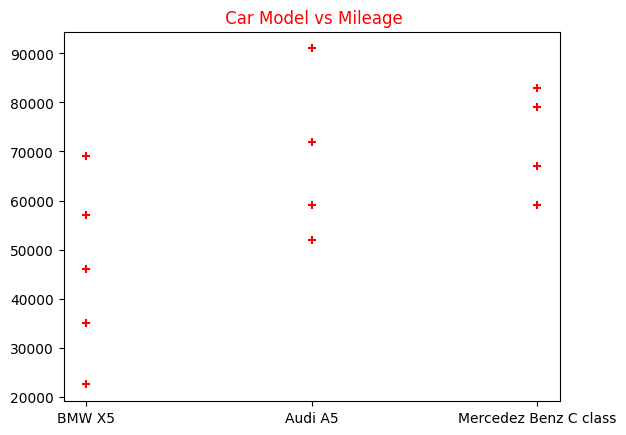

In [41]:
plt.scatter(data['Car Model'],final['Mileage'],marker='+',c='r')
plt.title(" Car Model vs Mileage",c ='r')
plt.show()

In [42]:
model = linear_model.LinearRegression()

In [43]:
model.fit(x,y)

LinearRegression()

In [44]:
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


<figure>
    <center> <img src="./images/Lecture 5 Exercise.PNG"  alt='missing' width="1100"  ><center/>
<figure/>

In [ ]:
model.predict([[45000,4,0,0]])

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
58976.625968537235+(-0.370122)*45000-1332.453628*4

In [50]:
model.predict([[86000,7,1,0]])

array([15365.40972059])

In [51]:
model.score(x,y)

0.9417050937281082